<a href="https://colab.research.google.com/github/solobala/CVML10/blob/main/CVML10_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%BC%D1%8D%D1%82%D1%87%D0%B8%D0%BD%D0%B3_%D0%BF%D0%BE_%D1%85%D0%B0%D1%80%D0%B0%D0%BA%D1%82%D0%B5%D1%80%D0%BD%D1%8B%D0%BC_%D1%82%D0%BE%D1%87%D0%BA%D0%B0%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Матчинг изображений по характерным точкам

\# pip install opencv-contrib-python==3.2.0.7 opencv-python==3.2.0.7

In [1]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Загружаем изображения для матчинга

In [2]:
img1 = cv2.imread('box.png', cv2.IMREAD_GRAYSCALE)          # шаблон
img2 = cv2.imread('box_in_scene.png', cv2.IMREAD_GRAYSCALE) # сцена

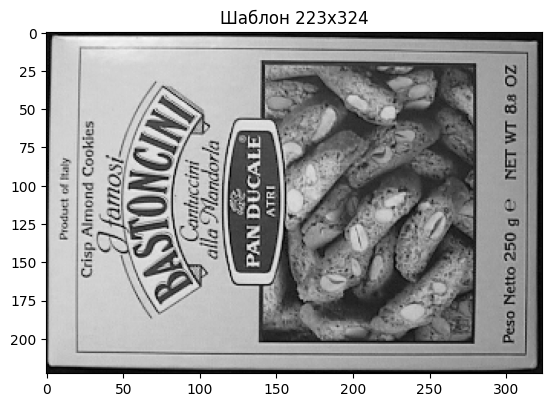

In [3]:
plt.imshow(img1, cmap='gray')
plt.title('Шаблон %dx%d' % img1.shape);

Text(0.5, 1.0, 'Сцена 384x512')

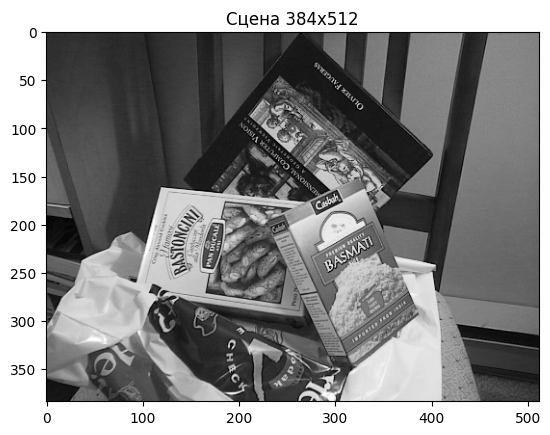

In [4]:
plt.imshow(img2, cmap='gray')
plt.title('Сцена %dx%d' % img2.shape)

## Ищем характерные точки и вычисляем для них дескрипторы

In [5]:
# https://en.wikipedia.org/wiki/Oriented_FAST_and_rotated_BRIEF

# инициализируем детектор точек
orb = cv2.ORB_create()

# запускаем поиск точек и вычисление дескрипторов
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

## Отображаем найденные характерные точки

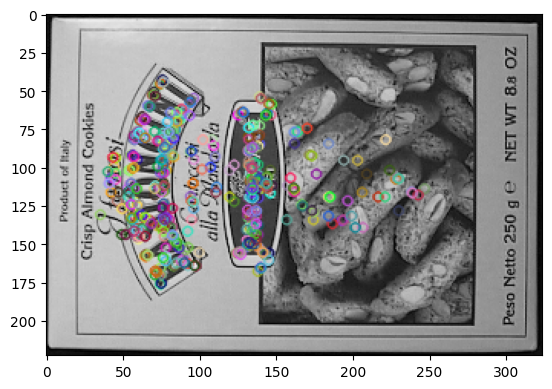

In [6]:
img1_kp = cv2.drawKeypoints(img1, kp1, np.zeros_like(img1))
plt.imshow(img1_kp)

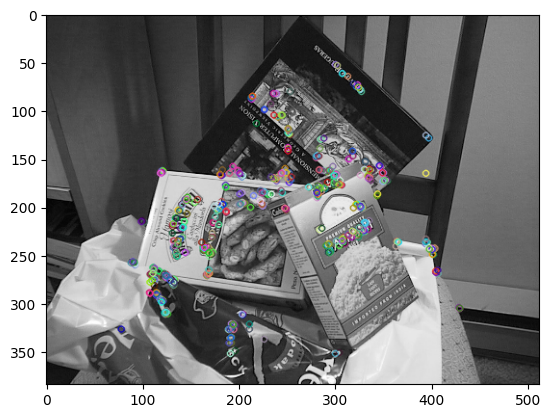

In [7]:
img2_kp = cv2.drawKeypoints(img2, kp2, np.zeros_like(img1))
plt.imshow(img2_kp)

## Ищем соответствия между шаблоном и сценой

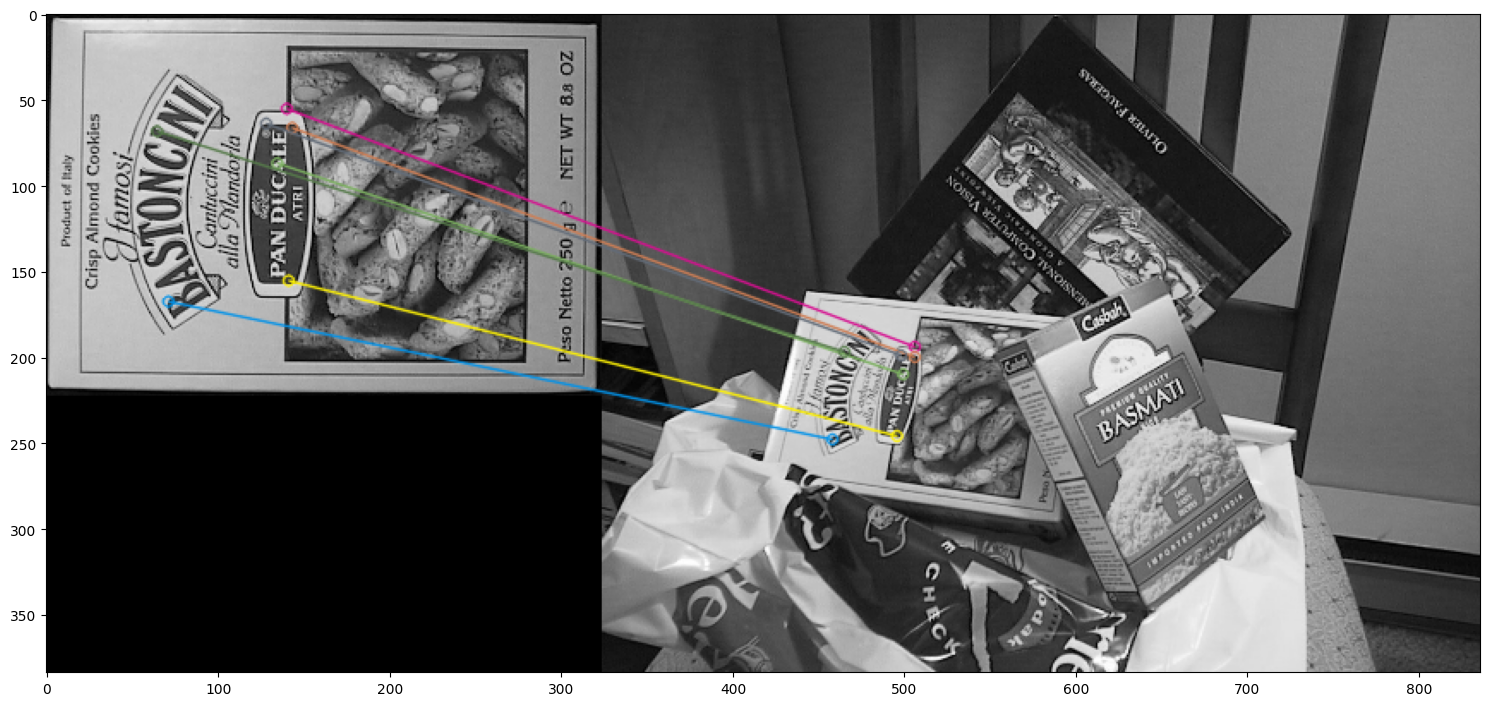

(<matplotlib.image.AxesImage at 0x7b2868981630>, None)

In [8]:
# матчинг полным перебором - brute force matching
# мера расстояния - расстояние Хэмминга (количество несовпадающих компонент)
bf = cv2.BFMatcher(cv2.NORM_HAMMING)

# матчинг
matches = bf.match(des1, des2)

# сортируем результат по убыванию расстояния
matches = sorted(matches, key = lambda x: x.distance)

# выводим 10 лучших совпадений
img3 = np.zeros_like(img2)
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:7], img3, flags=2)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.imshow(img3),plt.show()